In [12]:
import networkx as nx
import freeman as fm
import matplotlib.pyplot as plt
from pprint import pprint
import pymysql
import sys
from collections import defaultdict, OrderedDict
import graph_tool as gt
from graph_tool import centrality, draw
import pandas as pd
import statsmodels.api as sm
import statsmodels
import math
import numpy as np

import pickle

from setup import mysql_setup

# Decada 70

In [3]:

with open("listas.pickle", "rb") as fp:
    list_60, list_70, list_80, list_90, list_00, list_10 = pickle.load(fp)
with open("infos.pickle", "rb") as fp:
    d = pickle.load(fp)
with open("infos2.pickle", "rb") as fp:
    d_60, d_70, d_80, d_90, d_00 = pickle.load(fp)
with open("d_70_1_listas.pickle", "rb") as fp:
    lista_l, lista_p, lista_d, lista_b, lista_c = pickle.load(fp)

In [4]:
for i in range(len(lista_c)):
    if math.isnan(lista_c[i]):
        lista_c[i] = 0

## Popularity x Degree

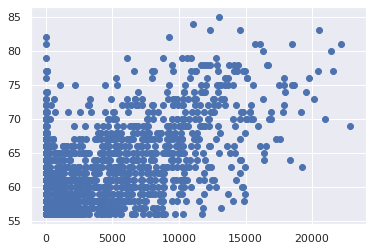

In [5]:
plt.scatter(lista_d, lista_p)
plt.show()

In [6]:
model_d = sm.OLS(lista_p, lista_d)
results_d = model_d.fit()
print(results_d.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              1561.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                   4.84e-235
Time:                        14:44:13   Log-Likelihood:                         -7864.7
No. Observations:                1510   AIC:                                  1.573e+04
Df Residuals:                    1509   BIC:                                  1.574e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Betweenness

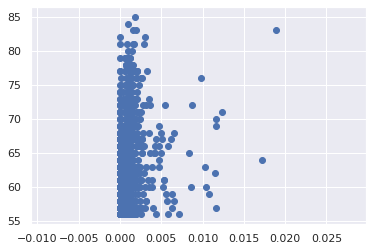

In [7]:
plt.scatter(lista_b, lista_p)
plt.show()

In [8]:
model_b = sm.OLS(lista_p, lista_b)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.274
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                              569.7
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                   4.41e-107
Time:                        14:44:13   Log-Likelihood:                         -8159.2
No. Observations:                1510   AIC:                                  1.632e+04
Df Residuals:                    1509   BIC:                                  1.633e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/liu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



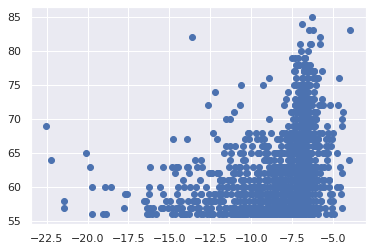

In [13]:
lista_b_log = np.log(lista_b)
lista_del = [0]
for i in range(len(lista_b_log)):
    if math.isnan(lista_b_log[i]) or math.isinf(lista_b_log[i]) :
        lista_del.append(i)
        
for j in reversed(lista_del):
    lista_b_log = np.delete(lista_b_log, j)
    lista_p = np.delete(lista_p, j)

plt.scatter(lista_b_log, lista_p)
plt.show()

In [14]:
model_b = sm.OLS(lista_p, lista_b_log)
results_b = model_b.fit()
print(results_b.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                          1.095e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        15:34:07   Log-Likelihood:                         -6103.0
No. Observations:                1367   AIC:                                  1.221e+04
Df Residuals:                    1366   BIC:                                  1.221e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Popularity x Closeness

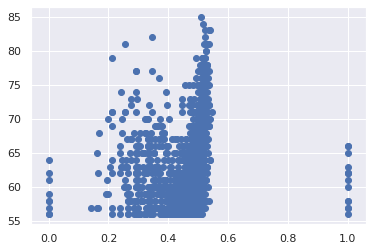

In [9]:
plt.scatter(lista_c, lista_p)
plt.show()

In [10]:
model_c = sm.OLS(lista_p, lista_c)
results_c = model_c.fit()
print(results_c.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.180e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):                        0.00
Time:                        14:44:14   Log-Likelihood:                         -6064.7
No. Observations:                1510   AIC:                                  1.213e+04
Df Residuals:                    1509   BIC:                                  1.214e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------